In [41]:
import pandas as pd 

data = pd.read_csv('./visitor.csv')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15888 entries, 0 to 15887
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15888 non-null  object 
 1   요일      15888 non-null  object 
 2   시간      15888 non-null  int64  
 3   성별      13081 non-null  object 
 4   연령      13081 non-null  float64
 5   유형      15888 non-null  object 
 6   방문수     15888 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 869.0+ KB


In [13]:
data['날짜']=pd.to_datetime(data['날짜'], format = '%Y-%m-%d')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15888 entries, 0 to 15887
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      15888 non-null  datetime64[ns]
 1   요일      15888 non-null  object        
 2   시간      15888 non-null  int64         
 3   성별      13081 non-null  object        
 4   연령      13081 non-null  float64       
 5   유형      15888 non-null  object        
 6   방문수     15888 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 869.0+ KB


In [15]:
data.head()

,날짜,요일,시간,성별,연령,유형,방문수
0,2023-08-28,월요일,10,NaN,NaN,pass,993
1,2023-08-28,월요일,11,NaN,NaN,pass,1927
2,2023-08-28,월요일,12,NaN,NaN,pass,2601
3,2023-08-28,월요일,13,NaN,NaN,pass,2616
4,2023-08-28,월요일,14,NaN,NaN,pass,2495


In [19]:
data.isnull().sum()


날짜        0
요일        0
시간        0
성별     2807
연령     2807
유형        0
방문수       0
dtype: int64

In [21]:
data['is_weekend'] = data['날짜'].dt.dayofweek > 4 
#5,6 : 주말

In [25]:
data[data['is_weekend'] == True]

,날짜,요일,시간,성별,연령,유형,방문수,is_weekend
82,2023-09-02,토요일,10,NaN,NaN,pass,822,True
83,2023-09-02,토요일,11,NaN,NaN,pass,1768,True
84,2023-09-02,토요일,12,NaN,NaN,pass,2370,True
85,2023-09-02,토요일,13,NaN,NaN,pass,3831,True
86,2023-09-02,토요일,14,NaN,NaN,pass,4185,True
...,...,...,...,...,...,...,...,...
15777,2024-03-31,일요일,21,female,40.0,not purchase,2,True
15778,2024-03-31,일요일,21,male,30.0,not purchase,1,True
15779,2024-03-31,일요일,21,unknown,-1.0,not purchase,2,True
15780,2024-03-31,일요일,21,unknown,-1.0,purchase,1,True


In [26]:
population_of_station = data.groupby('is_weekend')['방문수'].sum()

In [27]:
population_of_station

is_weekend
False    1118225
True      888991
Name: 방문수, dtype: int64

In [28]:
if population_of_station[False] == 0 or population_of_station[True] == 0 : 
    ratio = 'Undefined'
else: 
    ratio = population_of_station[True] / population_of_station[False]






In [ ]:
ratio

0.7950019003331172

In [34]:
import matplotlib.font_manager as fm 


font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname = font_path)
plt.rcParams['font.family'] = font_prop.get_name()


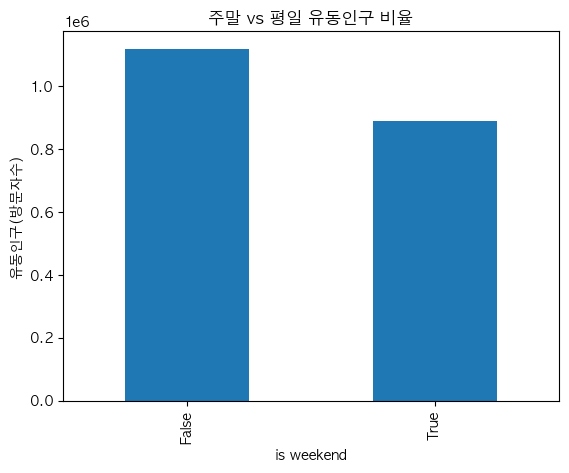

In [35]:
import matplotlib.pyplot as plt 
population_of_station.plot(kind= 'bar')
plt.title('주말 vs 평일 유동인구 비율')
plt.xlabel('is weekend')
plt.ylabel('유동인구(방문자수)')

plt.show() 

In [43]:
data['날짜'] = pd.to_datetime(data['날짜'])

In [44]:
data['day_of_week'] = data['날짜'].dt.day_of_week
weekend_data = data[data['day_of_week'] >= 5]
weekday_data = data[data['day_of_week'] < 5]



In [45]:
data

,날짜,요일,시간,성별,연령,유형,방문수,day_of_week
0,2023-08-28,월요일,10,NaN,NaN,pass,993,0
1,2023-08-28,월요일,11,NaN,NaN,pass,1927,0
2,2023-08-28,월요일,12,NaN,NaN,pass,2601,0
3,2023-08-28,월요일,13,NaN,NaN,pass,2616,0
4,2023-08-28,월요일,14,NaN,NaN,pass,2495,0
...,...,...,...,...,...,...,...,...
15883,2024-04-01,월요일,21,female,20.0,not purchase,1,0
15884,2024-04-01,월요일,21,female,20.0,purchase,1,0
15885,2024-04-01,월요일,21,female,40.0,not purchase,1,0
15886,2024-04-01,월요일,21,male,20.0,not purchase,1,0


In [49]:
average_weekend_traffic = weekend_data['방문수'].mean()
average_weekday_traffic = weekday_data['방문수'].mean()

print(f'average_weekday_traffic : {average_weekday_traffic}')
print(f'average_weekend_traffic : {average_weekend_traffic}')

average_weekday_traffic : 110.51838307966001
average_weekend_traffic : 154.07123050259966


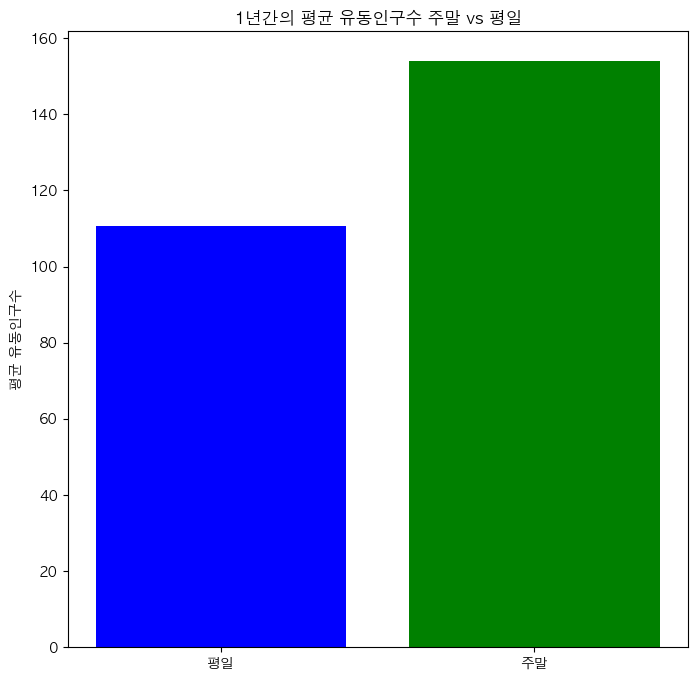

In [51]:
plt.figure(figsize = (8,8))
plt.bar(['평일','주말'], [average_weekday_traffic,average_weekend_traffic],color = ['blue','green'])
plt.ylabel('평균 유동인구수')
plt.title('1년간의 평균 유동인구수 주말 vs 평일')
plt.show()